# FLIGHT PRICE PREDICTION

### Problem Statement:
   
    Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
    available ticket on a given flight gets more and less expensive over time. This usually happens as 
    an attempt to maximize revenue based on -
    1. Time of purchase patterns (making sure last-minute purchases are expensive)
    2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
    to reduce sales and hold back inventory for those expensive last-minute expensive 
    purchases)
    So, you have to work on a project where you collect data of flight fares with other features and 
    work to make a model to predict fares of flights.
     STEPS
        1. Data Collection
            You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
            More the data better the model
            In this section you have to scrape the data of flights from different websites (yatra.com, 
            skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
            limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
            source, destination, route, departure time, arrival time, duration, total stops and the target variable 
            price. You can make changes to it, you can add or you can remove some columns, it completely
            depends on the website from which you are fetching the data.
        2. Data Analysis
            After cleaning the data, you have to do some analysis on the data. 
            Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
            to go up or down over time?
            What is the best time to buy so that the consumer can save the most by taking the least risk?
            Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
            morning flights expensive?
        3. Model Building
            After collecting the data, you need to build a machine learning model. Before model building do 
            all data pre-processing steps. Try different models with different hyper parameters and select 
            the bestmodel.
    Follow the complete life cycle of data science. Include all the steps like
        1. Data Cleaning
        2. Exploratory Data Analysis
        3. Data Pre-processing
        4. Model Building
        5. Model Evaluation
        6. Selecting the best mode

## Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows',None)

In [3]:
# loading the Dataset
df = pd.read_excel("Flight_price_prediction.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.columns    # checking the variables in column section.

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'], dtype='object')

### Dataframe Description:
    1. Airline : an organization providing a regular public service of air transport on one or more routes.
    2. Date of Journey : The day on which the journey begins is known as the day of journey / date of journey.
    3. Source : A place, person, or thing from which something originates or can be obtained.
    4. Destination :  The place to which someone or something is going or being sent.
    5. Route : A way or course taken in getting from a starting point to a destination.
    6. Departure Time : The time at which a public conveyance is scheduled to depart from a given point of origin.
    7. Arrival Time : The time at which a public conveyance is scheduled to arrive at a given destination.
    8. Duration : The time during which something continues.
    9. Total Stops : How many times the aircraft stops in between before reaching the destination.
    10. Additional Information : Added, extra, or supplementary to what is already present or available.
    11. Price : The selling price of something is the price for which it is sold.

#### In the above dataset the target is to predict the price of ticket.

In [5]:
df.info()  #Checking the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.shape #checking the data dimension

(10683, 11)

We have 10683 rows and 11 columns including the target column.

## Exploratory Data Analysis

## Preprocessing

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
#Check the null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#filling the missing values for categorical terms by mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [10]:
#Filled the null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

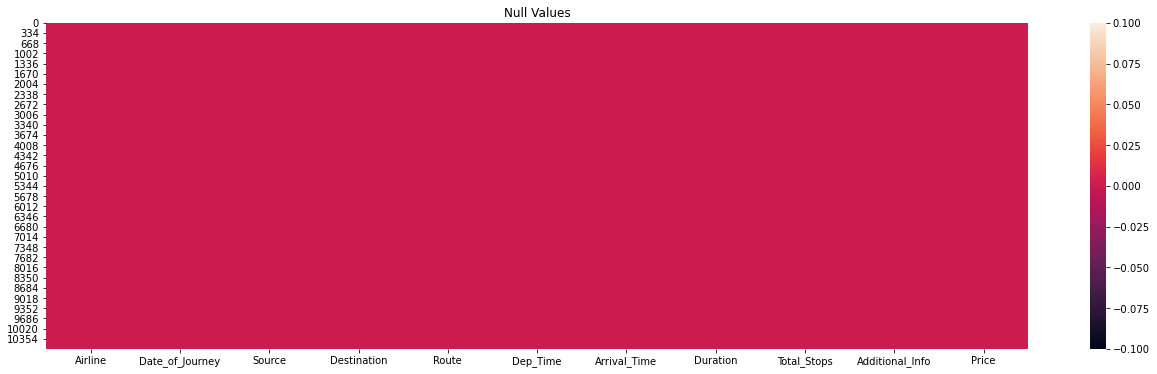

In [11]:
# Heatmap for Null value for data.
plt.figure(figsize=[22,6])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null value in the dataset.

Since, we can see lot of string values in the dataset.then, proceed with encoding techniques to convert the string data to numerical one.

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### In above dataset, dropping the certain features which does not cause any impact on target variable.

In [13]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897
1,Air India,Kolkata,Banglore,2 stops,No info,7662
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302


## Encoding of DataFrame:

###  One Hot Encoding for reamianing categorical features

In [14]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


### Creating Excel sheet for further process.

In [15]:
flight_price_prediction_after_one_hot_encoding = pd.DataFrame.from_dict(df)

# determining the name of the file
file_name = 'flight_price_prediction_after_one_hot_encoding.xlsx'
  
# saving the excel
flight_price_prediction_after_one_hot_encoding.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### Autoviz for Graphical representation

In [16]:
%%capture
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (10683, 35)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  33
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    35 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
1 numeric variables in data exceeds limit, taking top 30 variables


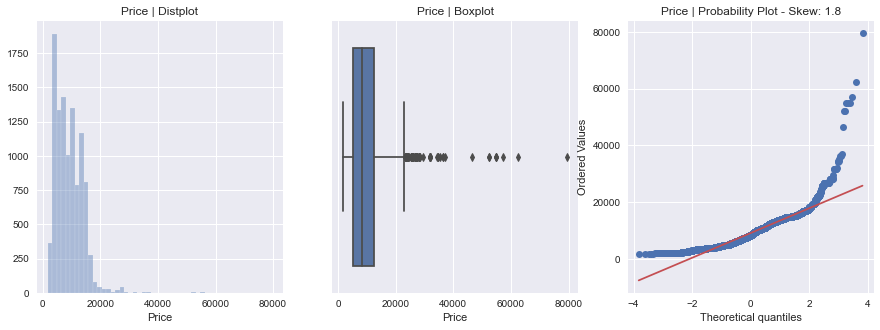

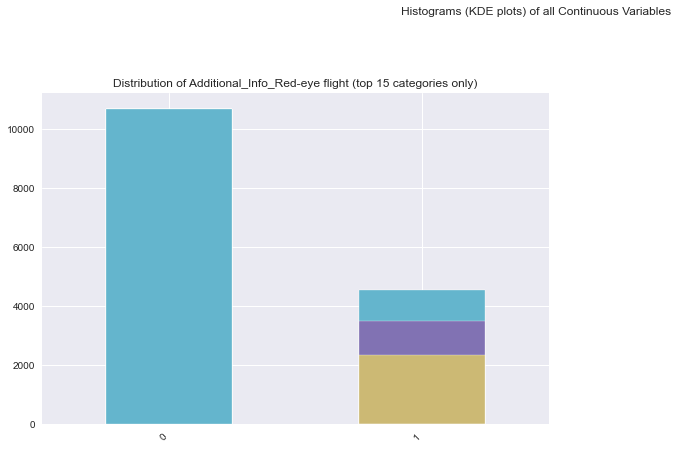

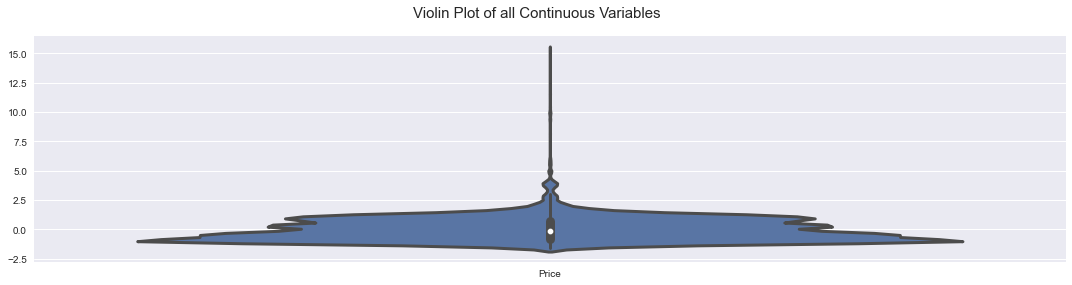

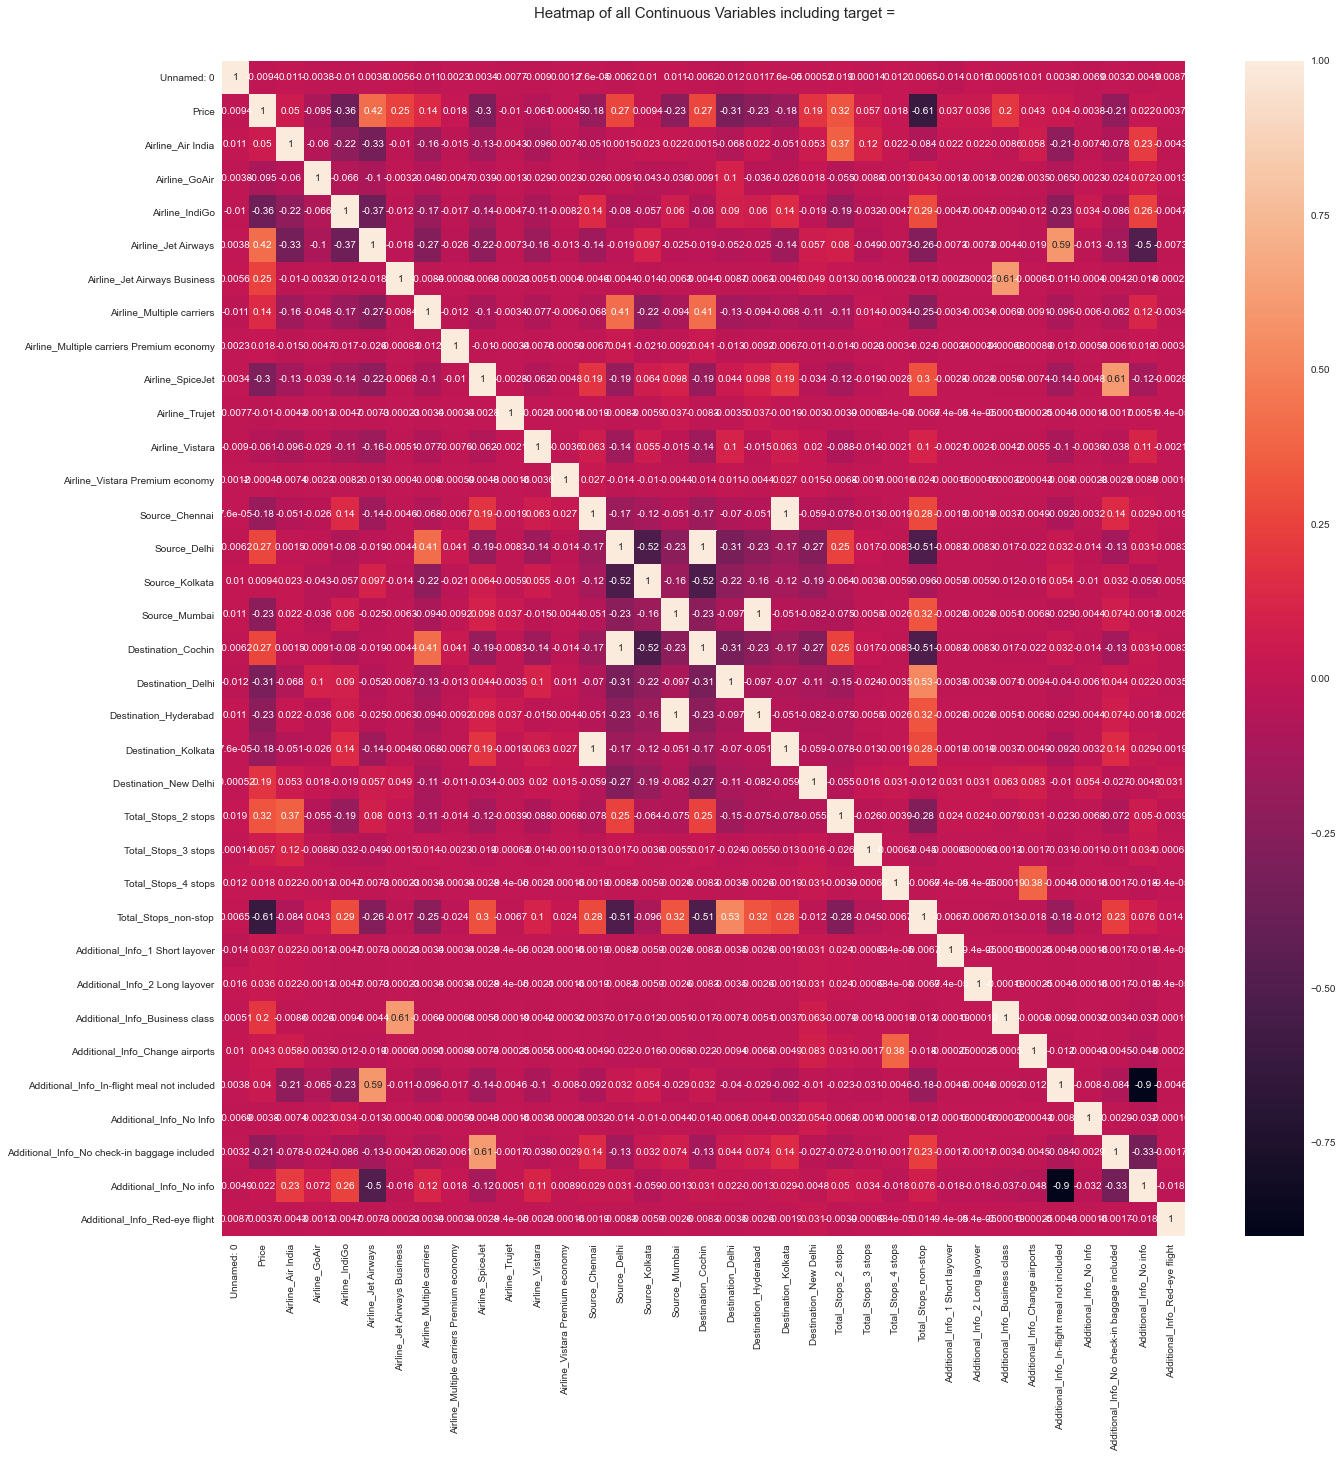

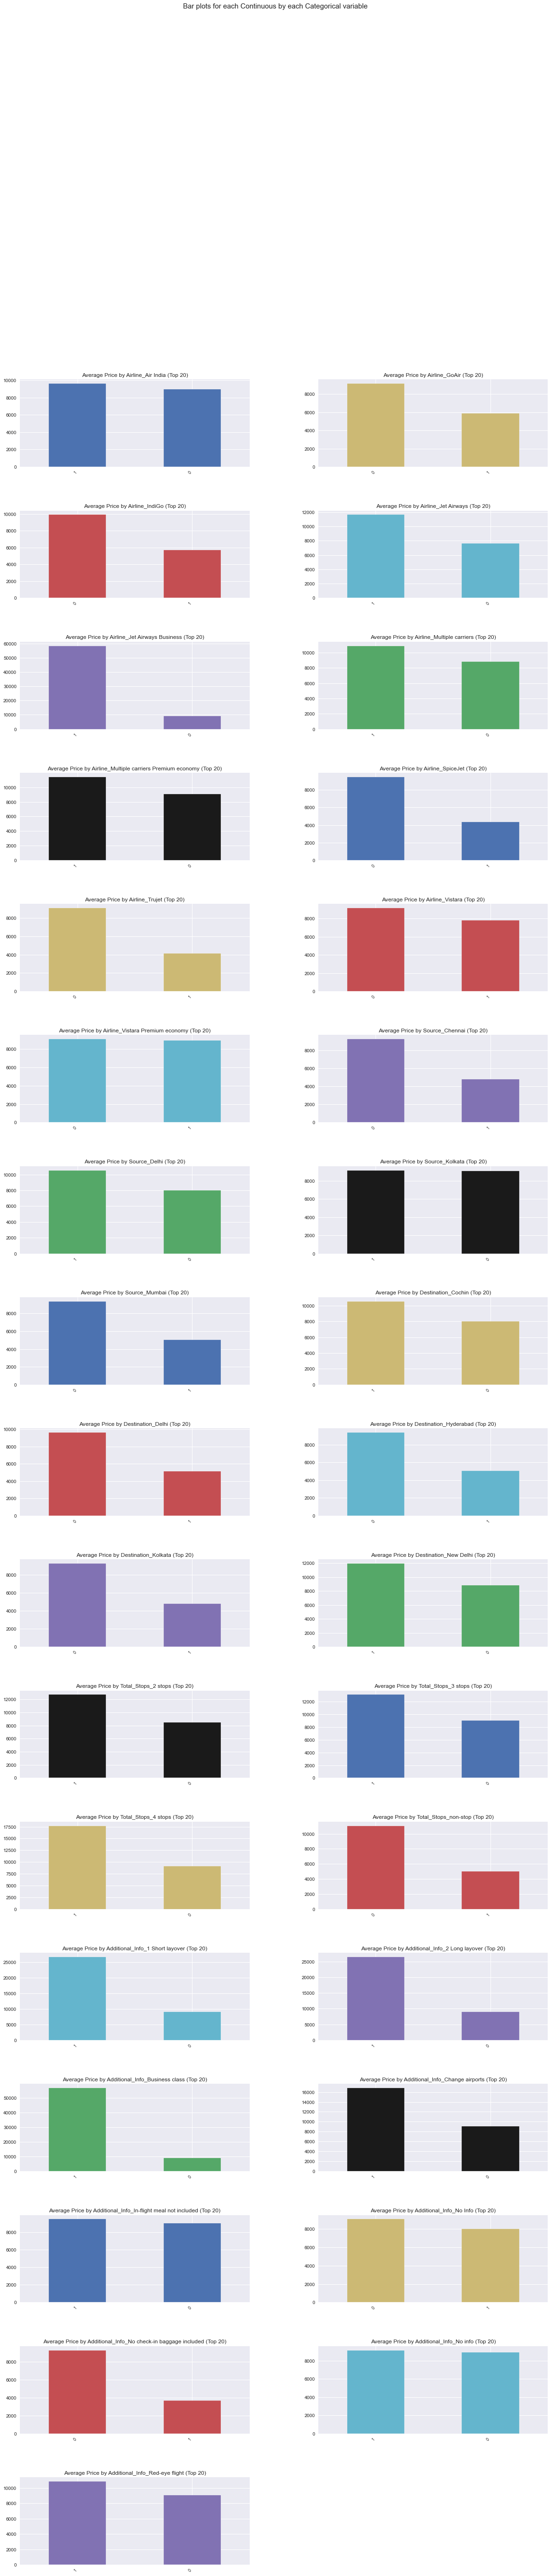

Time to run AutoViz (in seconds) = 14.390

 ###################### VISUALIZATION Completed ########################


In [17]:
df = AV.AutoViz("flight_price_prediction_after_one_hot_encoding.xlsx")

In [18]:
df.head()

,Unnamed: 0,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Describing Datasets:

In [19]:
# Stastistical summary
df_describe=df.describe()
df_describe

,Unnamed: 0,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,5341.000000,9087.064121,0.163999,0.018160,0.192174,0.360292,0.000562,0.111954,0.001217,0.076570,0.000094,0.044838,0.000281,0.035664,0.424693,0.268745,0.065244,0.424693,0.118412,0.065244,0.035664,0.087241,0.142282,0.004212,0.000094,0.326781,0.000094,0.000094,0.000374,0.000655,0.185528,0.000281,0.029954,0.781148,0.000094
std,3084.060797,4611.359167,0.370292,0.133535,0.394028,0.480108,0.023693,0.315324,0.034864,0.265921,0.009675,0.206957,0.016756,0.185460,0.494320,0.443328,0.246967,0.494320,0.323111,0.246967,0.185460,0.282202,0.349356,0.064768,0.009675,0.469058,0.009675,0.009675,0.019347,0.025591,0.388744,0.016756,0.170469,0.413488,0.009675
min,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2670.500000,5277.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5341.000000,8372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8011.500000,12373.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10682.000000,79512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outcome of descibe of datasets:

from the above plotting we are determining mean, standard deviation, minimum and mazinum value of each column. it helps us further in data cleaning.

### Total Number of rows in the datasets:
    1.18865 rows
    2.33 columns

## Checking Correlation 

In [20]:
corr_mat=df.corr()
corr_mat

,Unnamed: 0,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
Unnamed: 0,1.000000,-0.009440,0.010742,-0.003776,-0.010067,0.003797,0.005556,-0.010956,0.002333,0.003382,-0.007727,-0.009028,0.001223,0.000076,-0.006232,0.010071,0.011267,-0.006232,-0.012487,0.011267,0.000076,-0.000518,0.018531,0.000141,0.012051,0.006503,-0.014294,0.016220,0.000515,0.010023,0.003757,-0.006877,0.003207,-0.004856,0.008725
Price,-0.009440,1.000000,0.050346,-0.095146,-0.361048,0.416135,0.253302,0.139803,0.017651,-0.296552,-0.010380,-0.060646,-0.000453,-0.179216,0.270619,0.009377,-0.230745,0.270619,-0.313401,-0.230745,-0.179216,0.189785,0.320517,0.056771,0.018043,-0.613760,0.037047,0.036495,0.200306,0.042835,0.039825,-0.003789,-0.207384,0.022230,0.003747
Airline_Air India,0.010742,0.050346,1.000000,-0.060235,-0.216026,-0.332394,-0.010499,-0.157260,-0.015460,-0.127540,-0.004285,-0.095962,-0.007423,-0.051097,0.001502,0.023472,0.022206,0.001502,-0.068431,0.022206,-0.051097,0.052993,0.366695,0.115618,0.021845,-0.083823,0.021845,0.021845,-0.008572,0.057813,-0.211390,-0.007423,-0.077830,0.225266,-0.004285
Airline_GoAir,-0.003776,-0.095146,-0.060235,1.000000,-0.066332,-0.102063,-0.003224,-0.048288,-0.004747,-0.039162,-0.001316,-0.029466,-0.002279,-0.026154,-0.009063,-0.042912,-0.035930,-0.009063,0.099867,-0.035930,-0.026154,0.017576,-0.055391,-0.008845,-0.001316,0.042752,-0.001316,-0.001316,-0.002632,-0.003482,-0.064908,-0.002279,-0.023898,0.071985,-0.001316
Airline_IndiGo,-0.010067,-0.361048,-0.216026,-0.066332,1.000000,-0.366037,-0.011562,-0.173177,-0.017025,-0.140449,-0.004719,-0.105675,-0.008175,0.141918,-0.080215,-0.057200,0.059697,-0.080215,0.090369,0.059697,0.141918,-0.018612,-0.185730,-0.031722,-0.004719,0.288775,-0.004719,-0.004719,-0.009440,-0.012489,-0.232786,0.034363,-0.085708,0.256442,-0.004719
Airline_Jet Airways,0.003797,0.416135,-0.332394,-0.102063,-0.366037,1.000000,-0.017790,-0.266463,-0.026195,-0.216105,-0.007261,-0.162599,-0.012578,-0.144324,-0.019188,0.097467,-0.025363,-0.019188,-0.051759,-0.025363,-0.144324,0.056802,0.080012,-0.048810,-0.007261,-0.263879,-0.007261,-0.007261,-0.004446,-0.019217,0.587809,-0.012578,-0.131877,-0.498279,-0.007261
Airline_Jet Airways Business,0.005556,0.253302,-0.010499,-0.003224,-0.011562,-0.017790,1.000000,-0.008417,-0.000827,-0.006826,-0.000229,-0.005136,-0.000397,-0.004559,-0.004381,-0.014371,-0.006263,-0.004381,-0.008688,-0.006263,-0.004559,0.048675,0.012964,-0.001542,-0.000229,-0.016516,-0.000229,-0.000229,0.612200,-0.000607,-0.011314,-0.000397,-0.004166,-0.016119,-0.000229
Airline_Multiple carriers,-0.010956,0.139803,-0.157260,-0.048288,-0.173177,-0.266463,-0.008417,1.000000,-0.012393,-0.102242,-0.003435,-0.076928,-0.005951,-0.068281,0.413250,-0.215247,-0.093804,0.413250,-0.130127,-0.093804,-0.068281,-0.109770,-0.108070,0.013578,-0.003435,-0.247372,-0.003435,-0.003435,-0.006872,-0.009092,-0.096145,-0.005951,-0.062393,0.119008,-0.003435
Airline_Multiple carriers Premium economy,0.002333,0.017651,-0.015460,-0.004747,-0.017025,-0.026195,-0.000827,-0.012393,1.000000,-0.010051,-0.000338,-0.007563,-0.000585,-0.006713,0.040626,-0.021160,-0.009222,0.040626,-0.012792,-0.009222,-0.006713,-0.010791,-0.014216,-0.002270,-0.000338,-0.024319,-0.000338,-0.000338,-0.000676,-0.000894,-0.016659,-0.000585,

<AxesSubplot:title={'center':'Corrleation Matrix'}>

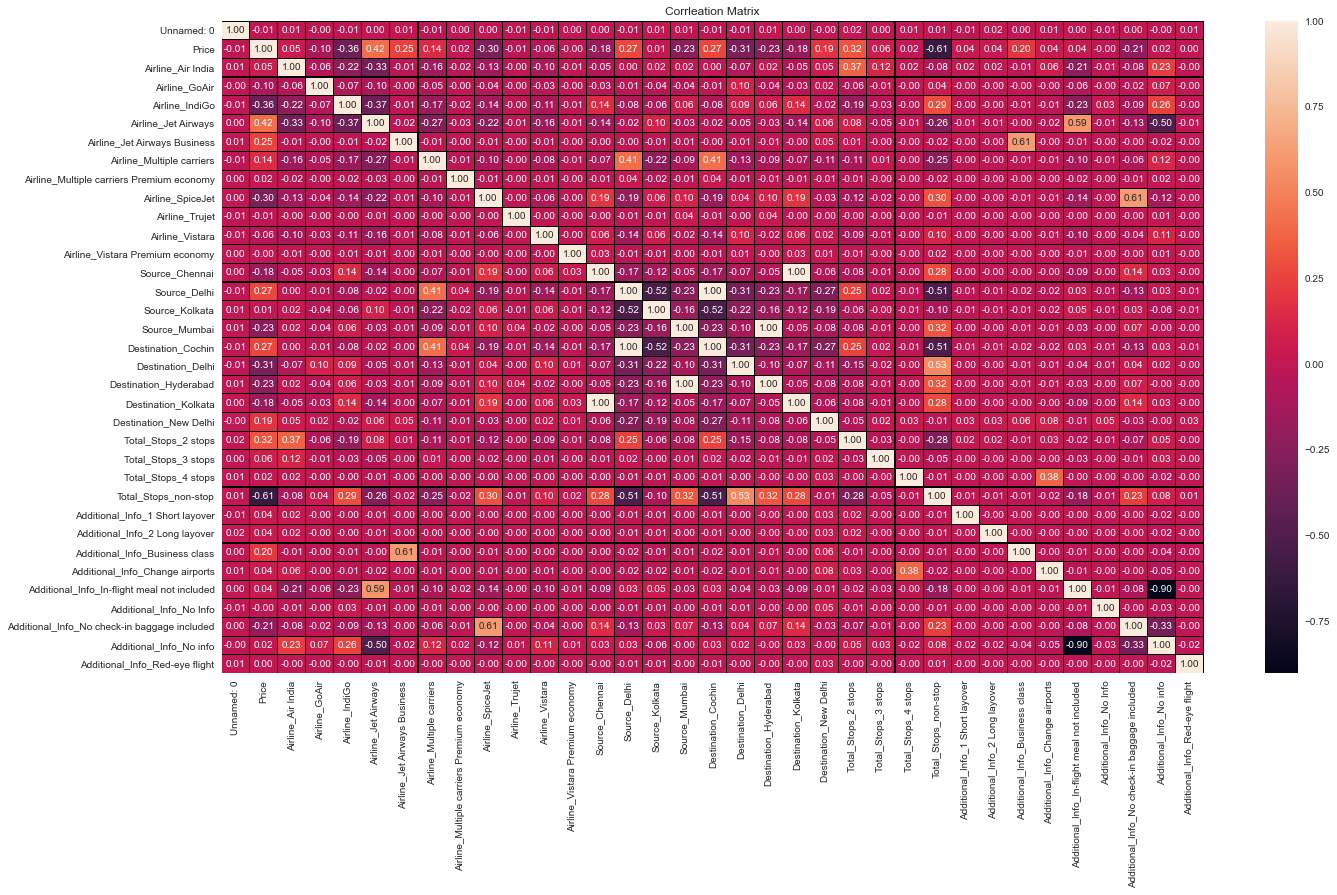

In [21]:
# Heatmap Display distribution of data across all level of category

plt.figure(figsize=(22,12))
plt.title("Corrleation Matrix")
sns.heatmap(corr_mat,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

#### Observations: We are unable to identify the correlation in above heatmap due to huge number of columns.

In [22]:
corr_matrix=df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                                           1.000000
Airline_Jet Airways                             0.416135
Total_Stops_2 stops                             0.320517
Destination_Cochin                              0.270619
Source_Delhi                                    0.270619
Airline_Jet Airways Business                    0.253302
Additional_Info_Business class                  0.200306
Destination_New Delhi                           0.189785
Airline_Multiple carriers                       0.139803
Total_Stops_3 stops                             0.056771
Airline_Air India                               0.050346
Additional_Info_Change airports                 0.042835
Additional_Info_In-flight meal not included     0.039825
Additional_Info_1 Short layover                 0.037047
Additional_Info_2 Long layover                  0.036495
Additional_Info_No info                         0.022230
Total_Stops_4 stops                             0.018043
Airline_Multiple carriers Premi

### Now we can clearly identify the correlation of independent variables with the target variables "Price".There are some variables who has less than 0.01 correlation value(very week relationship.)

### Checking the columns which are postively and negative correlated with the target columns:

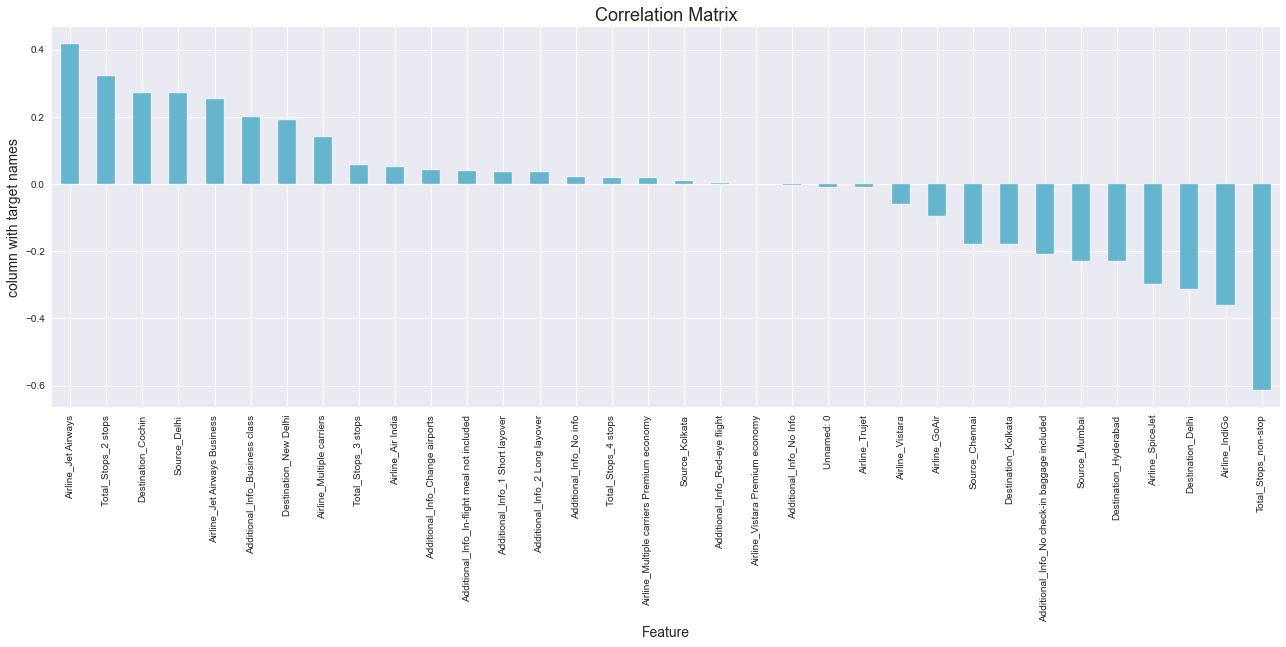

In [23]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)

plt.title('Correlation Matrix',fontsize=18)
plt.show()

### Outcome of Correlation:
    The Columns of the dataset is Correlated in both Positively and Negatively with target columns.
    The Positive and negative correlation values is shown in both numbers and graph.
    Max correlation:Airline_Jet Airways
    Min correlation:Total_Stops_non-stop  

### Lets check the data distribution among all the columns.

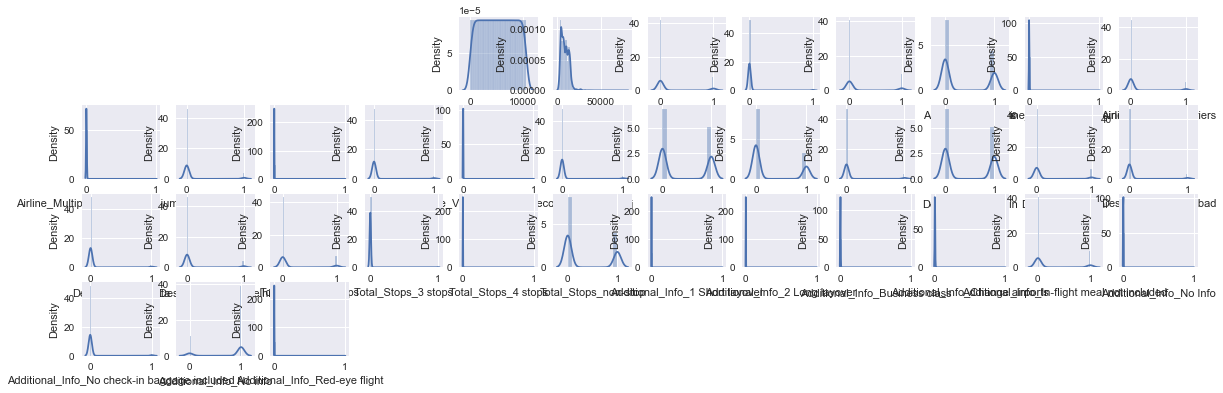

In [24]:
collist=df.columns.values
ncol=12
nrow=10
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,16))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+5)
    sns.distplot(df[collist[i]])

Now, we can see skewness in data for the multiple columns, will handle the skewness in further steps.

### Skewness:

In [25]:
#Checking skewness
df.skew()

Unnamed: 0                                        0.000000
Price                                             1.812552
Airline_Air India                                 1.815130
Airline_GoAir                                     7.218042
Airline_IndiGo                                    1.562748
Airline_Jet Airways                               0.582095
Airline_Jet Airways Business                     42.166335
Airline_Multiple carriers                         2.461716
Airline_Multiple carriers Premium economy        28.618184
Airline_SpiceJet                                  3.185227
Airline_Trujet                                  103.358599
Airline_Vistara                                   4.399442
Airline_Vistara Premium economy                  59.657352
Source_Chennai                                    5.008333
Source_Delhi                                      0.304745
Source_Kolkata                                    1.043466
Source_Mumbai                                     3.5214

### The feature variable are categorical.The handling skewness is not necessary. 

In [26]:
# Splitting the indepedent and target variable in x and y
x= df.drop('Price',axis=1)
y= df['Price']

In [27]:
x.head()

,Unnamed: 0,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## Importing  Libraries for Metrics and Model buiding.

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## Regression Method

In [29]:
maxR2=0
BestRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    r2=r2_score(y_test, predrf)
    if r2>maxR2:
        maxR2=r2
        BestRS=i
print("Best R2 is " ,maxR2," on Random_state ",BestRS)

Best R2 is  0.7286376944702844  on Random_state  193


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state = BestRS)

In [31]:
def eval(x):
    mod =x
    mod.fit(x_train, y_train)
    predict_test = mod.predict(x_test)
    print("R2 score is ", r2_score(y_test, predict_test)*100)
    print("Mean Absolute error is", mean_absolute_error(y_test,predict_test))
    print("Mean squared error is", mean_squared_error(y_test,predict_test))
    print("Root mean squared error is", np.sqrt(mean_squared_error(y_test,predict_test)))

In [32]:
eval(LinearRegression())

R2 score is  72.86376944702843
Mean Absolute error is 1719.4071651831964
Mean squared error is 5968432.015999599
Root mean squared error is 2443.0374569374903


In [33]:
eval(RandomForestRegressor())

R2 score is  66.22654942946244
Mean Absolute error is 1735.9504117922322
Mean squared error is 7428244.069584043
Root mean squared error is 2725.480520859403


In [34]:
eval(DecisionTreeRegressor())

R2 score is  51.01169990554466
Mean Absolute error is 2006.793167992513
Mean squared error is 10774648.237248478
Root mean squared error is 3282.4759309473206


In [35]:
eval(XGBRegressor())

R2 score is  75.15589966375032
Mean Absolute error is 1558.6733584656133
Mean squared error is 5464293.338978193
Root mean squared error is 2337.5827983150016


So, In our modelling approach, the best model is XGBoost Regreesor and the worst model is Decision Tree Regression. We can see that the difference in R2 score between the best model and the worst model is significant; the best model has almost 25 % of the R2 score of the worst model.but it can be due to overhitting also so we well check cross validation scores.

## Cross Validation:

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
scr=cross_val_score(LinearRegression(), x, y, cv=5)
print("cross validation score of Linear Regression model:",scr.mean()*100)

cross validation score of Linear Regression model: 67.23583827708424


In [38]:
scr=cross_val_score(RandomForestRegressor(), x, y, cv=5)
print("cross validation score of Random Forest Regressor model:",scr.mean()*100)

cross validation score of Random Forest Regressor model: 60.70954722032356


In [39]:
scr=cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
print("cross validation score of Decision Tree Regressor model:",scr.mean()*100)

cross validation score of Decision Tree Regressor model: 45.17646125857889


In [40]:
scr=cross_val_score(XGBRegressor(), x, y, cv=5)
print("cross validation score of XGBoost Regressor model:",scr.mean()*100)

cross validation score of XGBoost Regressor model: 65.70725190239332


### Min difference in R2 score and cross validation score is for Random Forest Regressor model,so this is our best model.

### Here we have handled the problem of the overfitting and the underfitting by checking the R2 score.

## Hyper Parameter Tuning

Import RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

### Hyper Parameter Tuning for Random Forest  Regressor

In [42]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [43]:
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rdr=RandomForestRegressor()
clf=RandomizedSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5}


In [44]:
rdr=RandomForestRegressor(n_estimators = 400, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto',
                         max_depth = 5)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 75.05489057500641
Cross Val Score: 68.31707703554824


### We are getting model accuracy and cross validation has 75% & 68% respectively.which shows our model is performing well.

## Analysis and Comparision

### MAE (Mean Absolute Error)

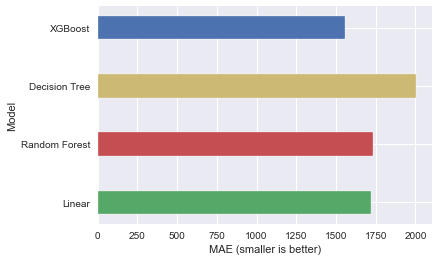

In [45]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost']
y = [1719, 1735, 2006, 1558]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Xgboost has the smallest MAE, 1558. After that, linear and Random Forest come with an similar error: 1719 and 1735. At last, the Decision Tree comes with a error of 2006.

So, In our experiment, the best model is Xgboost and the worst model is Decision Tree. We can see that the difference in MAE between the best model and the worst model is significant; the best model has least error of the worst model.

### MSE (Mean Squared Error)

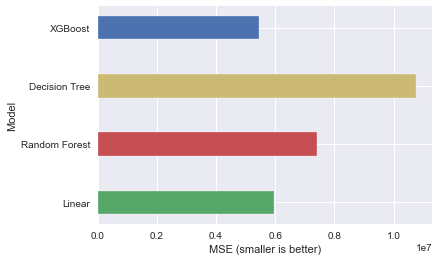

In [46]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost']
y = [5968432, 7428244, 10774648, 5464293]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="MSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Xgboost has the smallest MSE of 54,64,293. After that, Linear and Random Forest comes with similar errors: 59,68,432 and 74,28,244 respectively. At last, the Decision Tree comes with a error of 1,07,74,648.

So, in our experiment, the best model is Xgboost and the worst model is Decision Tree. We can see that the difference in MSE between the best model and the worst model is significant; the best model has least error of the worst model.

### RMSE (Root Mean Square Error)

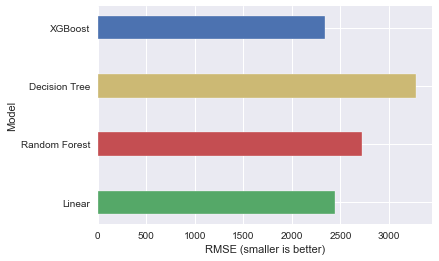

In [47]:
x = ['Linear','Random Forest', 'Decision Tree', 'XGBoost']
y = [2443, 2725, 3282, 2337]
colors = ["g", "r", "y", "b", "brown"]
fig, js = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
js.set(xlabel="RMSE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that Xgboost has the smallest RMSE of 2337. After that, Linear and Random Forest comes with similar errors: 2443 and 2725 respectively. At last, the Decision Tree with a errors of 3282.

So, in our experiment, the best model is Xgboost and the worst model is Decision Tree. We can see that the difference in RMSE between the best model and the worst model is significant; the best model has almost least error of the worst model.

We know that our best model is Xgboost but when compared with cross validation score it has overfitting and crossfitting is high. After compared with R2 score, minimum difference is for Random Forest. so finally , i choosen this is our best model for choice then the worst model is Decision Tree.

## Feature Importances

Now, let's see the most important features as for Random Forest Regressor:

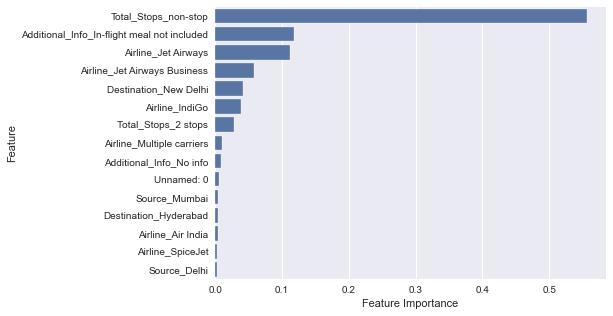

In [48]:
rdr_feature_importances = rdr.feature_importances_
rdr_feature_importances = pd.Series(rdr_feature_importances, 
                                    index=x_train.columns.values).sort_values(ascending=False).head(15)

fig, js = plt.subplots(figsize=(7,5))
sns.barplot(x=rdr_feature_importances, y=rdr_feature_importances.index, color="b");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

## Model Saving

In [49]:
import pickle
filename='Flight_Price_Prediction_Project.pkl'
pickle.dump(rdr, open(filename, 'wb'))

## Conclusion

In [50]:
loaded_model = pickle.load(open('Flight_Price_Prediction_Project.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

75.05489057500641


In [51]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,

                                                ***** END *****